# **An NLP system for the classification of product reviews**

## **Multinomial logistic regression**

In [1]:
!wget https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt

--2025-01-17 06:12:21--  https://raw.githubusercontent.com/cbannard/lela60331_24-25/refs/heads/main/coursework/Compiled_Reviews.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22322605 (21M) [text/plain]
Saving to: ‘Compiled_Reviews.txt’

Compiled_Reviews.tx 100%[===================>]  21.29M  19.5MB/s    in 1.1s    

2025-01-17 06:12:25 (19.5 MB/s) - ‘Compiled_Reviews.txt’ saved [22322605/22322605]



In [2]:
reviews=[]
sentiment_ratings=[]
product_types=[]
helpfulness_ratings=[]

with open("Compiled_Reviews.txt") as f:
  for line in f.readlines()[1:]:
    fields=line.rstrip().split('\t')
    reviews.append(fields[0])
    sentiment_ratings.append(fields[1])
    product_types.append(fields[2])
    helpfulness_ratings.append(fields[3])

## **A. Dataset Analysis**

In [47]:
def find_ranges(dataset,target):
  """
  Function:
    1. Analyze the distribution of the raw dataset
  Inputs:
    dataset: The raw dataset
    target: The target class
  Return:
    ranges: The ranges of different classes in the dataset
  """
  ranges=[]
  start=None

  for i,value in enumerate(dataset):
    if value==target:
      if start is None:
        start=i
    elif start is not None:
      ranges.append(start if start==i-1 else (start,i-1))
      start=None

  if start is not None:
    ranges.append(start if start==len(dataset)-1 else (start,len(dataset)-1))

  return ranges

In [48]:
def Count(dataset):
  """
  Function:
    1. Count the number of different classes in the raw dataset to know their distributions
  Inputs:
    dataset: The raw dataset
  Return:
    results: A list of the rank of different classes
  """
  Counts=Counter(dataset)
  results=[]
  for label,count in Counts.items():
    ranges=find_ranges(dataset,label)
    results.append((label,count,ranges))
  return results

sentiment_results=Count(sentiment_ratings)
product_results=Count(product_types)
helpfulness_results=Count(helpfulness_ratings)

In [49]:
def table(results,title):
  """
  Function:
    1. Draw the table about the information in former function
  Inputs:
    results: A list of the rank of different classes
    title: The title of the table
  """
  print(f"{title}\n")
  print("{:<30} {:<10} {:<20}".format("Type","Count","Range"))
  print("-"*60)
  for label,count,ranges in results:
    print(f"{label:<30} {count:<10} {ranges}")
  print("\n")

In [50]:
def Plot(results,title,size=(3.5,4),color='skyblue',bar_width=0.8,fontsize_title=12,fontsize_labels=10,fontweight='bold',rotation=0,ha="center",start_step=0,end_step=2200):
  """
  Function:
    1. Draw the bar chart about the distribution of different classes
  Inputs:
    results: A list of the rank of different classes
    title: The title of the bar chart
    size: The size of the bar chart
    color: The color of the bar
    bar_width: The bin width of the bar
    fontsize_title: The font size of the title
    fontsize_labels: The font size of the x and y labels
    fontweight: The fontweight of the title and the x and y labels
    rotation & ha: How to put the name of different classes under the y-axis
    start_step & end_step: The range of the y-axis
  """
  labels=[r[0] for r in results]
  counts=[r[1] for r in results]
  plt.figure(figsize=size)
  plt.bar(labels,counts,color=color,width=bar_width)
  plt.title(title,fontsize=fontsize_title,fontweight=fontweight)
  plt.xlabel('Labels',fontsize=fontsize_labels,fontweight=fontweight)
  plt.ylabel('Counts',fontsize=fontsize_labels,fontweight=fontweight)
  plt.xticks(labels,rotation=rotation,ha=ha)
  for i,c in enumerate(counts):
    plt.text(i,c+0.5,str(c),ha='center',va='bottom',fontsize=10)
  plt.ylim(start_step,end_step)
  plt.tight_layout()
  plt.show()

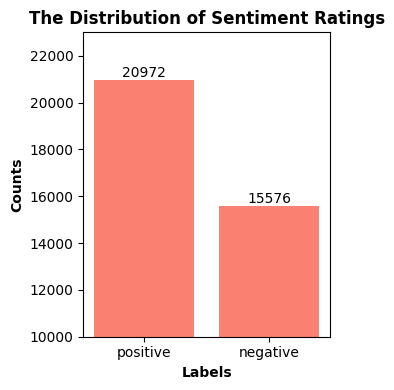

Sentiment Ratings

Type                           Count      Range               
------------------------------------------------------------
positive                       20972      [(0, 20971)]
negative                       15576      [(20972, 36547)]




In [51]:
Plot(sentiment_results,"The Distribution of Sentiment Ratings",color='salmon',start_step=10000,end_step=23000)
table(sentiment_results,"Sentiment Ratings")

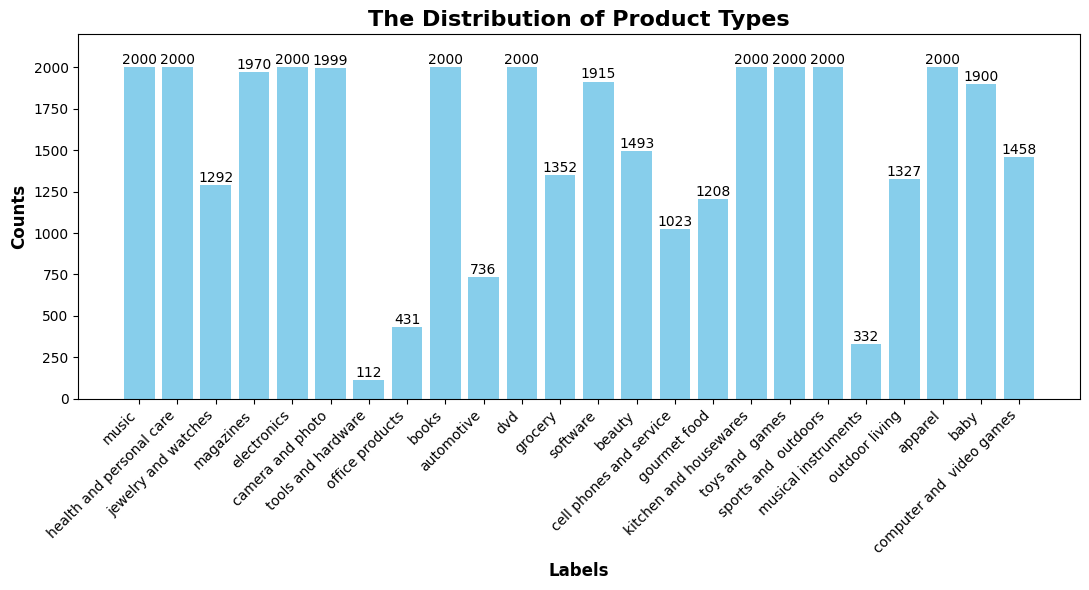

Product Types

Type                           Count      Range               
------------------------------------------------------------
music                          2000       [(0, 999), (20972, 21971)]
health and personal care       2000       [(1000, 1999), (21972, 22971)]
jewelry and watches            1292       [(2000, 2999), (22972, 23263)]
magazines                      1970       [(3000, 3999), (23264, 24233)]
electronics                    2000       [(4000, 4999), (24234, 25233)]
camera and photo               1999       [(5000, 5999), (25234, 26232)]
tools and hardware             112        [(6000, 6097), (26233, 26246)]
office products                431        [(6098, 6464), (26247, 26310)]
books                          2000       [(6465, 7464), (26311, 27310)]
automotive                     736        [(7465, 8048), (27311, 27462)]
dvd                            2000       [(8049, 9048), (27463, 28462)]
grocery                        1352       [(9049, 10048), (284

In [52]:
Plot(product_results,"The Distribution of Product Types",size=(11,6),fontsize_title=16,fontsize_labels=12,rotation=45,ha="right")
table(product_results,"Product Types")

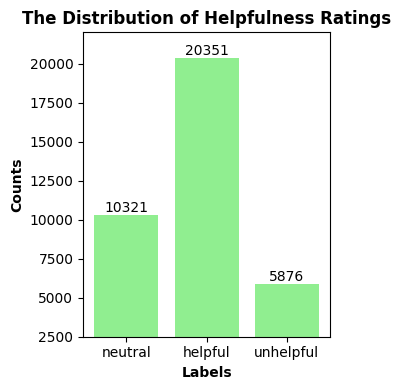

Helpfulness Ratings

Type                           Count      Range               
------------------------------------------------------------
neutral                        10321      [0, 4, (6, 7), 10, (17, 18), (21, 22), 25, (38, 41), 44, 46, 49, 51, (54, 57), 61, 71, 73, 81, (87, 90), 94, 96, 112, (132, 133), 135, 139, 145, 148, (151, 153), 155, 157, 159, (162, 163), (165, 166), (168, 169), 175, 177, 186, 188, 190, (196, 197), 199, 204, (210, 211), 215, (226, 227), 232, 235, 246, (253, 254), 266, (270, 271), 278, 280, (284, 286), (288, 289), 291, 294, 307, (317, 318), 325, (328, 329), (333, 334), 337, 339, (342, 343), (349, 350), 357, 361, (364, 366), 376, 379, 388, 392, 398, 400, (402, 403), 411, 417, 421, 425, (435, 436), (445, 446), (450, 451), 456, (463, 465), 467, 470, 473, 476, 478, 482, (484, 485), (488, 490), (493, 494), 497, 503, 505, 511, (514, 515), 521, 534, 536, 547, 549, 555, 559, 561, 578, 583, (594, 595), 605, (609, 610), 614, 622, 626, 640, 645, 649, 652, 659, 66

In [53]:
Plot(helpfulness_results,"The Distribution of Helpfulness Ratings",color='lightgreen',fontsize_title=12,fontsize_labels=10,start_step=2500,end_step=22000)
table(helpfulness_results,"Helpfulness Ratings")

## **B. libraries and information**

In [3]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re
import math
import random

In [4]:
"""
A list of the stop words cited from the github "NLTK's list of english stopwords"
The related website: https://gist.github.com/sebleier/554280
"""
stop_words={"i","me","my","myself","we","our","ours","ourselves","you","your",
      "yours","yourself","yourselves","he","him","his","himself","she","her",
      "hers","herself","it","its","itself","they","them","their","theirs",
      "themselves","what","which","who","whom","this","that","these","those",
      "am","is","are","was","were","be","been","being","have","has","had",
      "having","do","does","did","doing","a","an","the","and","but","if",
      "or","because","as","until","while","of","at","by","for","with",
      "about","against","between","into","through","during","before","after",
      "above","below","to","from","up","down","in","out","on","off","over",
      "under","again","further","then","once","here","there","when","where",
      "why","how","all","any","both","each","few","more","most","other",
      "some","such","no","nor","not","only","own","same","so","than",
      "too","very","s","t","can","will","just","don","should","now"}

stop_words.update({"amazon","would","etc","got","go","went","thing","also","ve","m","d"}) # a custom set for Amazon reviews
punctuation={".",",","!","?",";",":","-","_","*","(",")","[","]","{","}","'s",
      "'re","&","#","'ve","'m","'ll","'d","\\","/","'","\"","+"}
keep_words={"no","nor","not"} # Remove negetive words for the sentiment anaylsis
stopwords_list=(stop_words|punctuation)-keep_words

## **C. Data Preprocessing**

In [5]:
def preprocess_text(text,regex='[^ ]+',toptoken_num=2500,
          apply_stopwords_list=False,stopwords=stopwords_list,n=1):
  """
  Function:
    1. Apply the regular expression to the dataset of reviews for word segmentation
    2. Apply the stopwords list to the dataset
    3. Apply the bigram logic to the dataset
    4. Count the frequency of tokens in the dataset and restore a list of the most frequent tokens
  Inputs:
    text: the raw text of reviews
    regex: A regular expression to decide how to tokenize the dataset
    toptoken_num: The number of the most frequent tokens to be used
    apply_stopwords_list: A boolean value to decide whether the dataset need to fliter stopwords
    stopwords: Load the set of stopwords
    n: A value to decide use unigram or bigram
  Return:
    newtext: The preprocessed dataset of reviews
    token_list: The preprocessed dataset of all tokens
    toptoken_list: The preprocessed dataset of the most frequent tokens
  """
  newtext=[]
  token_list=[]
  for txt in text:
    words=re.findall(regex,txt.lower())
    if apply_stopwords_list:
      words=[w for w in words if w not in stopwords]
    if n>1 and len(words)>=n:
      words=[' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    newtext.append(words)

  for s in newtext:
    token_list.extend(s)

  counts=Counter(token_list)
  counts_sort=sorted(counts.items(),key=lambda x:x[1],reverse=True)
  token_freq=list(zip(*counts_sort))
  token=token_freq[0]
  toptoken_list=token[:toptoken_num]

  return newtext,token_list,toptoken_list

In [6]:
def feature_coding(newtext,type_list,TF_IDF=False):
  """
  Function:
    1. Build the matrix of features by using TF-IDF vector representation
    2. Build the one-hot encoding matrix of features
  Inputs:
    newtext: The preprocessed dataset of reviews
    type_list: The preprocessed dataset of the most frequent tokens
    TF_IDF: A boolean value to decide whether the matrix of dataset need to use the TF-IDF matrix
  Return:
    M: The preprocessed matrix of features
  """
  num_docs=len(newtext)
  num_tokens=len(type_list)
  M=np.zeros((num_docs, num_tokens))

  if TF_IDF==True:
    # calculate TF
    TF=np.zeros((num_docs,num_tokens))
    for i,doc in enumerate(newtext):
      token_count=Counter(doc)  # Word frequency of the current document
      total_tokens=len(doc)  # The total number of words in the current document
      for word in token_count:
        if word in type_list:
          j=type_list.index(word)
          TF[i,j]=token_count[word]/total_tokens

    # calculate IDF
    doc_count=np.zeros(num_tokens)
    for j,word in enumerate(type_list):
      doc_count[j]=sum(1 for doc in newtext if word in doc)
    IDF=np.log((num_docs+1)/(doc_count+1))  # Add 1 to avoid a denominator of 0

    # calculate TF-IDF
    M=TF*IDF

  else:
    for i,utt in enumerate(reviews):
      # Tokenise the current review:
      tokens=re.findall("[^ ]+",utt)
      # iterate over the words in our type list (the set of 5000 words):
      for j,t in enumerate(type_list):
        # if the current word j occurs in the current review i then set the matrix element at i,j to be one. Otherwise leave as zero.
        if t in tokens:
          M[i,j]=1
  return M


In [7]:
def tokenization(text,regex='[^ ]+',toptoken_num=2500,apply_stopwords_list=False,
         stopwords=stopwords_list,n=1,TF_IDF=False):
  """
  Function:
    1. realize the former functions to preprocess and tokenize the raw dataset of reviews
  Inputs:
    text: The raw dataset of reviews
    regex: A regular expression to decide how to tokenize the dataset
    toptoken_num: The number of the most frequent tokens to be used
    apply_stopwords_list: A boolean value to decide whether the dataset need to fliter stopwords
    stopwords: A set of stopwords
    n: A value to decide use unigram or bigram
    TF_IDF: A boolean value to decide whether the matrix of dataset need to use TF-IDF
  return:
    newtext: The preprocessed dataset of reviews
    tokens: The preprocessed dataset of tokens
    toptokens: The preprocessed dataset of the most frequent tokens
  """
  newtext,tokens,toptokens=preprocess_text(text,regex,toptoken_num,apply_stopwords_list,stopwords,n)
  M=feature_coding(newtext,toptokens,TF_IDF)
  return newtext,tokens,toptokens,M

In [8]:
def split_dataset(label_data,M):
  """
  Function:
    1. Split the label dataset of target tasks into training, development and test sets
    2. One-hot encoding of the labels
  Input:
    label_data: A list of labels corresponding to the dataset, which can be choosen as "sentiment_ratings", "product_types" or "helpfulness_ratings"
    M: The preprocessed dataset of features
  return:
    M_train: The training dataset of features
    M_test: The test dataset of features
    M_dev: The development dataset of features
  """
  train_ints=np.random.choice(len(label_data),int(len(label_data)*0.8),replace=False)
  remaining_ints=list(set(range(len(label_data)))-set(train_ints))
  test_ints=np.random.choice(remaining_ints,int(len(remaining_ints)*0.5),replace=False)
  dev_ints=list(set(remaining_ints)-set(test_ints))

  M_train=M[train_ints].T
  M_test=M[test_ints].T
  M_dev=M[dev_ints].T

  unique_labels=list(set(label_data))
  unique_one_hot=np.diag(np.ones(len(unique_labels)))

  labels_train=[label_data[i] for i in train_ints]
  labels_test=[label_data[i] for i in test_ints]
  labels_dev=[label_data[i] for i in dev_ints]

  y_train=np.array([unique_one_hot[unique_labels.index(x)] for x in labels_train]).T
  y_test=np.array([unique_one_hot[unique_labels.index(x)] for x in labels_test]).T
  y_dev=np.array([unique_one_hot[unique_labels.index(x)] for x in labels_dev]).T

  M_train=M_train.T
  M_test=M_test.T
  M_dev=M_dev.T
  y_train=y_train.T
  y_test=y_test.T
  y_dev=y_dev.T

  return M_train,M_test,M_dev,y_train,y_test,y_dev

In [9]:
newtext,tokens,toptokens,M=tokenization(reviews,regex='[^ ]+',toptoken_num=2500,apply_stopwords_list=False,
         stopwords=stopwords_list,n=1,TF_IDF=False)

In [10]:
M_train,M_test,M_dev,y_train,y_test,y_dev=split_dataset(product_types,M)
print("M_train stats: min =", np.min(M_train), ", max =", np.max(M_train))
print(M_train.shape)
print(y_train.shape)
y_train

M_train stats: min = 0.0 , max = 1.0
(29238, 2500)
(29238, 24)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **D. Model Training**

In [11]:
def training(M_train,y_train,k=32,lr=0.001,n_iters=200,num_features=2500):
  """
  Function:
    1. Train the logistic regression model
  Inputs:
    M_train: The preprocessed dataset of features
    y_train: The preprocessed dataset of labels
    k: batch size
    lr: learning rate
    n_iters: Number of Iterations
    num_features: Number of features
  return:
    weights: The trained weights matrix
    logistic_loss: The loss of logistic regression
  """
  indices=np.arange(y_train.shape[0])
  np.random.shuffle(indices)
  batches=np.array_split(indices,k)

  np.random.seed(10)
  num_classes=y_train.shape[1]
  logistic_loss=[]
  weights=np.random.rand(num_features,num_classes)
  epsilon=1e-10

  # batch training
  for i in range(n_iters):
    loss=0.0
    for b in batches:
      X_batch=M_train[b]
      y_batch=y_train[b]
      if X_batch.shape[0]==0:
        continue
      z=X_batch.dot(weights)
      z_sum=np.exp(z).sum(axis=1,keepdims=True)
      q=np.array([np.exp(z_i)/z_sum[i] for i,z_i in enumerate(z)])
      loss+=np.mean(-np.log2(np.sum(y_batch*q,axis=1)+epsilon))# Add epsilon to avoid log with base zero

      dw=X_batch.T.dot(q-y_batch)
      weights-=lr*dw

    logistic_loss.append(loss)
  print("Final Weights Matrix Shape:", weights.shape)
  print("Final Weights Matrix(sample):", weights[:5, :5])

  plt.plot(range(n_iters),logistic_loss,label="Logistic Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  return weights,logistic_loss

## **E. Model Evaluattion**

In [12]:
def evaluation(M_set,y_set,weights,epsilon=1e-10):
  """
  Function:
    1. Evaluate the logistic regression model by the rates of precision, recall, macroaverage precision and macroaverage recall
  Inputs:
    M_set: The preprocessed dataset of features
    y_set: The preprocessed dataset of labels
    weights: The trained weights matrix
    epsilon: An additional value to avoid a denominator of 0 when calculating the rates of precision and recall
  return:
    precision: Precision rate
    recall: Recall rate
    p_macro: Macroaverage precision
    r_macro: Macroaverage recall
  """
  z=M_set.dot(weights)
  z_sum=np.exp(z).sum(axis=1,keepdims=True)
  q=np.array([np.exp(z_i)/z_sum[i] for i,z_i in enumerate(z)])
  pred=np.argmax(q,axis=1)
  true=np.argmax(y_set,axis=1)

  num_classes=y_set.shape[1]
  TP,FP,FN=[],[],[]
  for j in range(num_classes):
    TP.append(np.sum((pred==j) & (true==j)))
    FP.append(np.sum((pred==j) & (true!=j)))
    FN.append(np.sum((pred !=j) & (true==j)))

  precision=np.array(TP)/(np.array(TP)+np.array(FP)+epsilon) # Add epsilon to avoid a denominator of 0
  recall=np.array(TP)/(np.array(TP)+np.array(FN)+epsilon)
  print('Precision:',precision)
  print('Recall:',recall)

  p_macro=precision.mean()
  r_macro=recall.mean()
  print('Macroaverage Precision:',p_macro)
  print('Macroaverage Recall:',r_macro)

  return precision,recall,p_macro,r_macro

## **F. Main fuction**

In [13]:
def main(label_data,apply_stopwords_list=False,n=1,TF_IDF=False,k=32,
     lr=0.001,n_iters=200,toptoken_num=2500,regex='[^ ]+',eval_set="test"):
  """
  Function:
    1. Call all the former functions
  Inputs:
    label_data: A list of labels corresponding to the dataset, which can be choosen as "sentiment_ratings", "product_types" or "helpfulness_ratings"
    apply_stopwords_list: A boolean value to decide whether the dataset need to fliter stopwords
    n: A value to decide use unigram or bigram
    TF_IDF: A boolean value to decide whether the matrix of dataset need to use TF-IDF
    toptoken_num: The number of the most frequent tokens to be used
    regex: A regular expression to decide how to tokenize the dataset
    k: batch size
    lr: learning rate
    n_iters: Number of Iterations
    eval_set: Specify which set to evaluate (use"train" for training set, use "test" for test set, or use "dev" for development set)
  return:
    precision: Precision rate of the target dataset
    recall: Recall rate of the target dataset
    p_macro: Macroaverage precision of the target dataset
    r_macro: Macroaverage recall of the target dataset
  """
  a,b,c,M=tokenization(reviews,regex=regex,toptoken_num=toptoken_num,
            apply_stopwords_list=apply_stopwords_list,
            stopwords=stopwords_list,n=n,TF_IDF=TF_IDF)

  M_train,M_test,M_dev,y_train,y_test,y_dev=split_dataset(label_data,M)

  weights,logistic_loss=training(M_train,y_train,k=k,lr=lr,n_iters=n_iters,
                 num_features=M_train.shape[1])
  if eval_set=="train":
    M_eval,y_eval=M_train,y_train
  elif eval_set=="dev":
    M_eval,y_eval=M_dev,y_dev
  else:
    M_eval,y_eval=M_test,y_test

  precision,recall,p_macro,r_macro=evaluation(M_eval,y_eval,weights)
  return precision,recall,p_macro,r_macro

## **G. Tests on three tasks**
There are eight tests under each task. Each evaluation variables followed by two digitals:
- The first digital represents three classification tasks:
  
  1. Sentiment

  2. Product Types

  3. Helpfulness

- The second digital represents eight methods of feature engineering

  1. Unigram Tokenization
  2. Unigram Tokenization with TF-IDF Representation Matrix
  3. Unigram Tokenization with Stopwords flitering
  4. Unigram Tokenization with both TF-IDF Representation Matrix and Stopwords flitering
  5. Bigram Tokenization
  6. Bigram Tokenization with TF-IDF Representation Matrix
  7. Bigram Tokenization with Stopwords flitering
  8. Bigram Tokenization with both TF-IDF Representation Matrix and Stopwords flitering

### **1. Sentiment(8/8)**

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[0.37873362 0.41333897]
 [0.85886942 0.5235827 ]
 [0.38363357 0.33967009]
 [0.53012418 0.4284694 ]
 [0.16502418 0.09242647]]


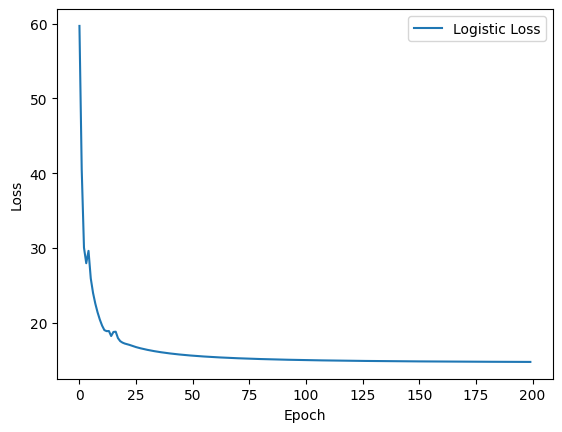

Precision: [0.83040665 0.81086519]
Recall: [0.86435786 0.76713198]
Macroaverage Precision: 0.8206359227452982
Macroaverage Recall: 0.8157449220266029


In [65]:
# Unigram Tokenization
precision11,recall11,p_macro11,r_macro11=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (5000, 2)
Final Weights Matrix(sample): [[0.37772244 0.41435015]
 [0.83880827 0.54364385]
 [0.35877757 0.36452609]
 [0.52718542 0.43140815]
 [0.16673902 0.09071163]]


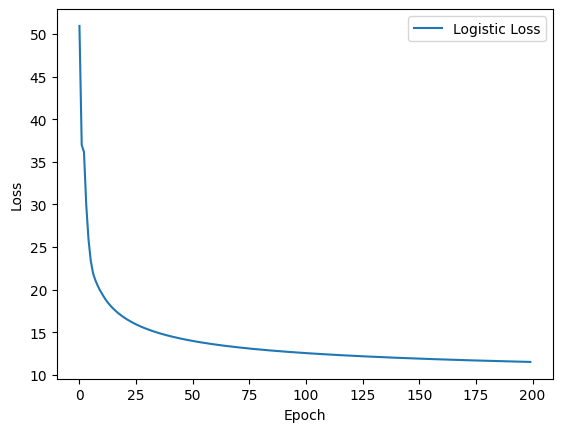

Precision: [0.86973366 0.78301887]
Recall: [0.83886035 0.82232497]
Macroaverage Precision: 0.8263762620493855
Macroaverage Recall: 0.8305926563038446


In [66]:
# Unigram Tokenization with 5000 toptokens
precision11_5000,recall11_5000,p_macro11_5000,r_macro11_5000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=5000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[ 0.39964162  0.39243097]
 [ 0.86232756  0.52012456]
 [ 0.39583282  0.32747083]
 [ 0.51983804  0.43875554]
 [ 0.2588491  -0.00139845]]


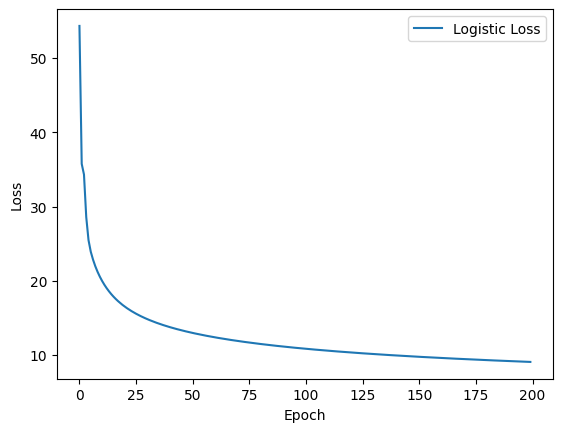

Precision: [0.85064011 0.82600259]
Recall: [0.86960737 0.80213568]
Macroaverage Precision: 0.8383213505600182
Macroaverage Recall: 0.8358715231513383


In [67]:
# Unigram Tokenization with 10000 toptokens
precision11_10000,recall11_10000,p_macro11_10000,r_macro11_10000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[ 0.6477488   0.14432379]
 [ 2.17501353 -0.79256142]
 [ 0.59593202  0.12737164]
 [ 1.3404522  -0.38185863]
 [ 0.41525637 -0.15780572]]


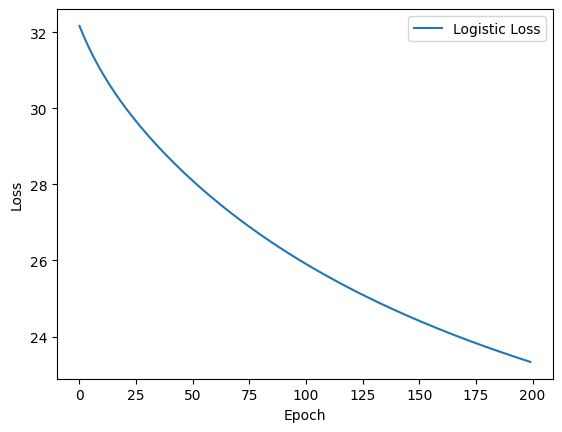

Precision: [0.77868852 0.8436214 ]
Recall: [0.90909091 0.65495208]
Macroaverage Precision: 0.8111549618835087
Macroaverage Recall: 0.78202149288407


In [68]:
# Unigram with TF-IDF
precision12,recall12,p_macro12,r_macro12=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[ 0.62202618  0.17004641]
 [ 2.11034001 -0.72788789]
 [ 0.56968452  0.15361914]
 [ 1.30754986 -0.34895629]
 [ 0.42836364 -0.17091299]]


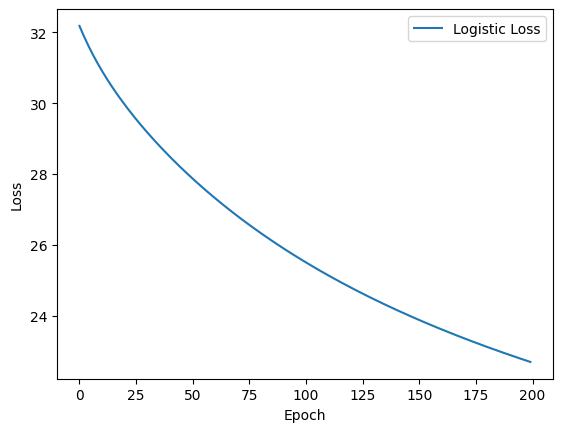

Precision: [0.79486134 0.840399  ]
Recall: [0.91032228 0.6677675 ]
Macroaverage Precision: 0.8176301700885935
Macroaverage Recall: 0.7890448913055788


In [69]:
# Unigram with TF-IDF and 10000 toptokens
precision12_10000,recall12_10000,p_macro12_10000,r_macro12_10000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[-2.86556985e-04  7.92359150e-01]
 [ 7.49521151e-01  6.32930966e-01]
 [ 3.68522266e-01  3.54781391e-01]
 [ 4.31013933e-01  5.27579644e-01]
 [ 9.43998004e-02  1.63050850e-01]]


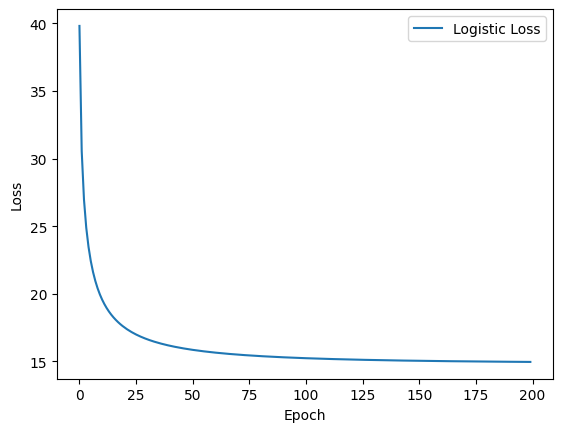

Precision: [0.83286252 0.79033312]
Recall: [0.84641148 0.77316294]
Macroaverage Precision: 0.8115978195755553
Macroaverage Recall: 0.8097872112753115


In [70]:
# Unigram with stopwords flitering
precision13,recall13,p_macro13,r_macro13=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[-0.08725761  0.8793302 ]
 [ 0.7230375   0.65941462]
 [ 0.33570161  0.38760204]
 [ 0.3984072   0.56018638]
 [ 0.16838457  0.08906608]]


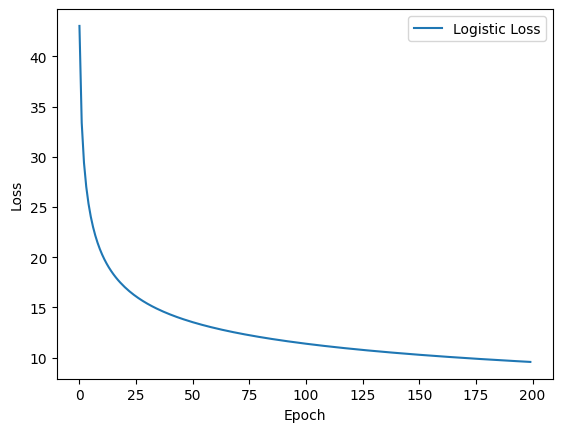

Precision: [0.86877395 0.791321  ]
Recall: [0.84726763 0.81902246]
Macroaverage Precision: 0.8300474709464633
Macroaverage Recall: 0.8331450445074828


In [71]:
# Unigram with stopwords flitering and 10000 toptokens
precision13,recall13,p_macro13,r_macro13=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[-5.20749295  5.99956554]
 [ 1.10426188  0.27819023]
 [ 0.66042398  0.06287968]
 [-0.53212268  1.49071626]
 [ 1.04203423 -0.78458358]]


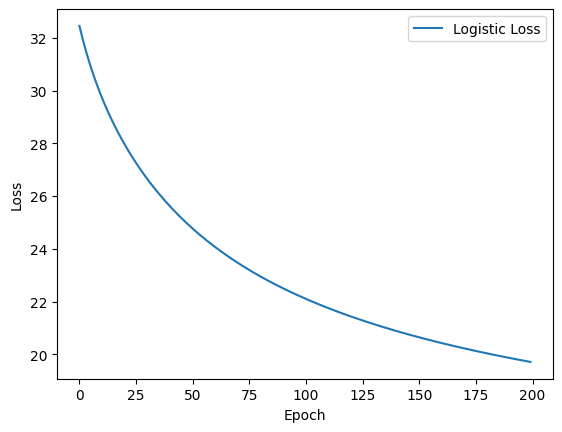

Precision: [0.82875169 0.82520891]
Recall: [0.87990431 0.7571885 ]
Macroaverage Precision: 0.8269803017996791
Macroaverage Recall: 0.8185464023112805


In [72]:
# Unigram with both TF-IDF and stopwords flitering
precision14,recall14,p_macro14,r_macro14=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[-5.15260093  5.94467353]
 [ 1.04389055  0.33856157]
 [ 0.67250236  0.0508013 ]
 [-0.55156097  1.51015455]
 [ 1.18406271 -0.92661206]]


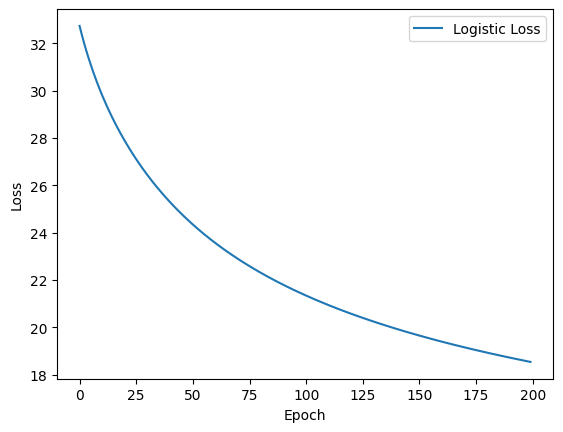

Precision: [0.848     0.8341637]
Recall: [0.89117235 0.77410832]
Macroaverage Precision: 0.8410818505337593
Macroaverage Recall: 0.8326403358471639


In [73]:
# Unigram with both TF-IDF and stopwords flitering and 10000 toptokens
precision14_10000,recall14_10000,p_macro14_10000,r_macro14_10000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]]


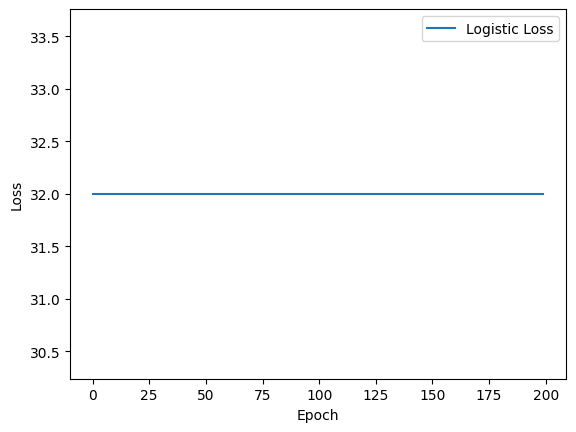

Precision: [0.57181943 0.        ]
Recall: [1. 0.]
Macroaverage Precision: 0.2859097127222904
Macroaverage Recall: 0.4999999999999761


In [74]:
# Bigram Tokenization
precision15,recall15,p_macro15,r_macro15=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]]


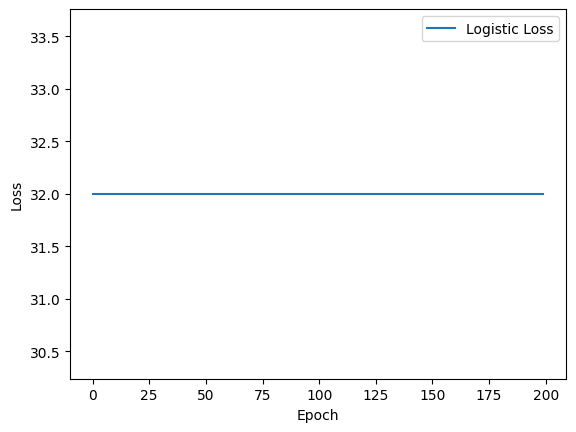

Precision: [0.58577291 0.        ]
Recall: [1. 0.]
Macroaverage Precision: 0.2928864569083367
Macroaverage Recall: 0.49999999999997663


In [75]:
# Bigram Tokenization with 10000 toptokens
precision15_10000,recall15_10000,p_macro15_10000,r_macro15_10000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[ 0.56028773  0.23178486]
 [ 1.10818214  0.27426998]
 [ 1.78423631 -1.06093265]
 [ 2.63828671 -1.67969314]
 [ 0.18645801  0.07099264]]


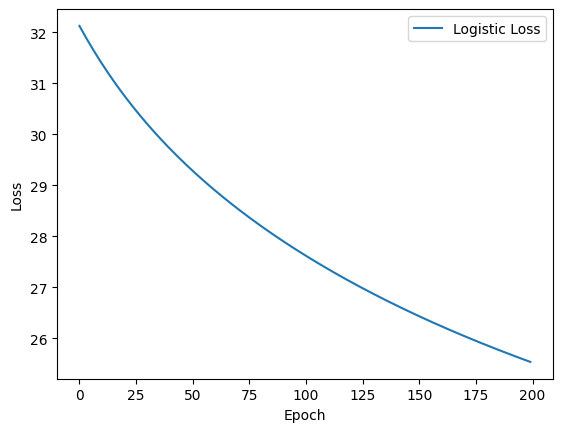

Precision: [0.73310554 0.84427032]
Recall: [0.92392344 0.55079872]
Macroaverage Precision: 0.7886879330564789
Macroaverage Recall: 0.7373610835103628


In [76]:
# Bigram with TF_IDF
precision16,recall16,p_macro16,r_macro16=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[ 0.52790571  0.26416688]
 [ 1.13203397  0.25041815]
 [ 1.80581143 -1.08250777]
 [ 2.60224541 -1.64365183]
 [ 0.01828032  0.23917033]]


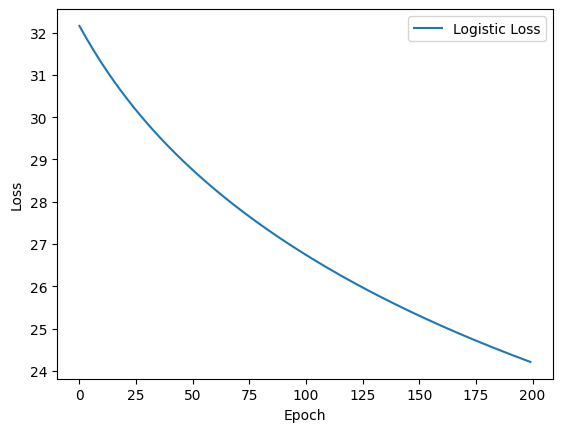

Precision: [0.74499018 0.84144144]
Recall: [0.91505792 0.59001895]
Macroaverage Precision: 0.7932158091293126
Macroaverage Recall: 0.7525384332080072


In [14]:
# Bigram with TF_IDF and 10000 tokens
precision16_10000,recall1610000,p_macro1610000,r_macro1610000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]]


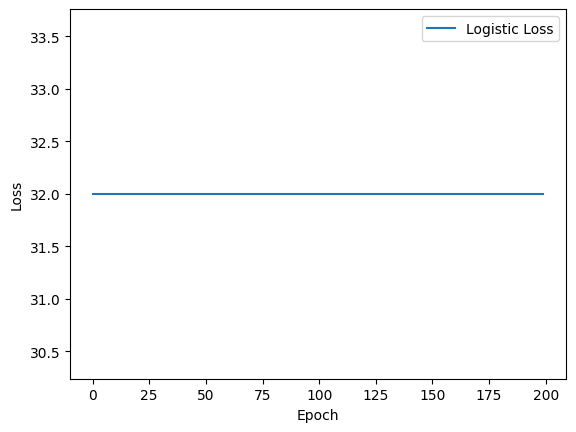

Precision: [0.57181943 0.        ]
Recall: [1. 0.]
Macroaverage Precision: 0.2859097127222904
Macroaverage Recall: 0.4999999999999761


In [15]:
# Bigram with stopwords flitering
precision17,recall17,p_macro17,r_macro17=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]]


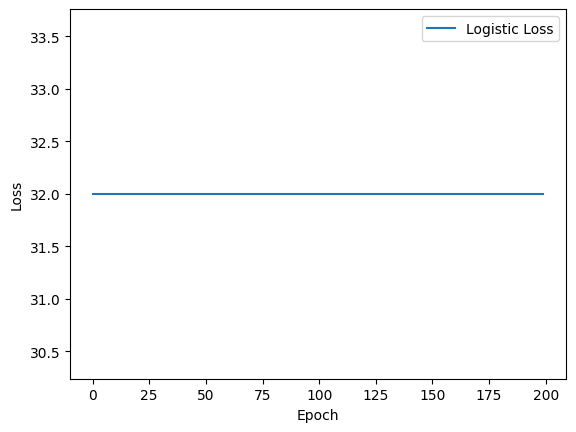

Precision: [0.58577291 0.        ]
Recall: [1. 0.]
Macroaverage Precision: 0.2928864569083367
Macroaverage Recall: 0.49999999999997663


In [16]:
# Bigram with stopwords flitering and 10000 toptokens
precision17_10000,recall17_10000,p_macro17_10000,r_macro17_10000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (2500, 2)
Final Weights Matrix(sample): [[-0.09936347  0.89143607]
 [ 0.65701446  0.72543765]
 [ 1.37163163 -0.64832798]
 [ 3.59476419 -2.63617062]
 [-0.06678328  0.32423393]]


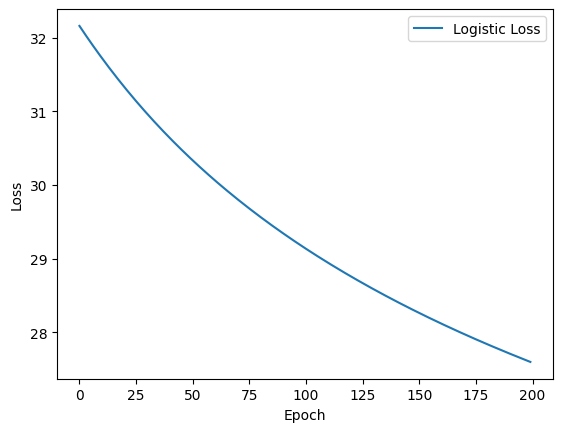

Precision: [0.74692443 0.71718637]
Recall: [0.81339713 0.63194888]
Macroaverage Precision: 0.7320553978774853
Macroaverage Recall: 0.7226730054878305


In [17]:
# Bigram with both TF-IDF and stopwords flitering
precision18,recall18,p_macro18,r_macro18=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 2)
Final Weights Matrix(sample): [[-0.05334966  0.84542225]
 [ 0.77287095  0.60958117]
 [ 1.25157117 -0.52826751]
 [ 3.6221477  -2.66355412]
 [-0.07979574  0.33724639]]


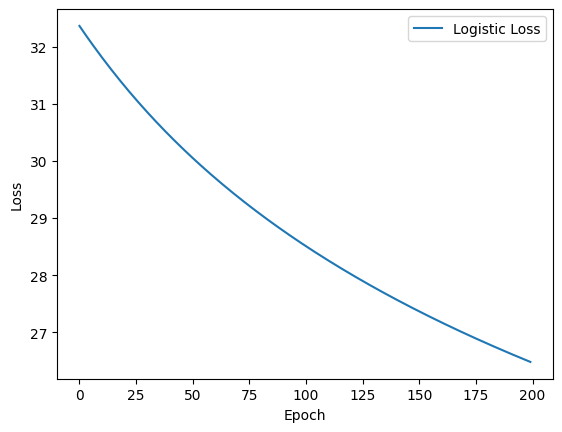

Precision: [0.77787381 0.74571216]
Recall: [0.84072863 0.66050198]
Macroaverage Precision: 0.7617929833448579
Macroaverage Recall: 0.750615306493239


In [18]:
# Bigram with both TF-IDF and stopwords flitering and 10000 toptokens
precision18_10000,recall18_10000,p_macro18_10000,r_macro18_10000=main(label_data=sentiment_ratings,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

### **2. Product type((8/8))**

Final Weights Matrix Shape: (2500, 24)
Final Weights Matrix(sample): [[ 0.76492334  0.70794566  0.80518081  0.35621407 -0.06538675]
 [ 0.46947224  0.47074896  0.71542487  0.58125736  0.47368075]
 [ 0.43135996  0.47447477  0.42750311  0.93556454  0.38348725]
 [ 0.46485982  0.40319695  0.62165358  0.37016323  0.03604679]
 [ 0.67927557  0.19578792  0.301711    0.67549454  0.19941139]]


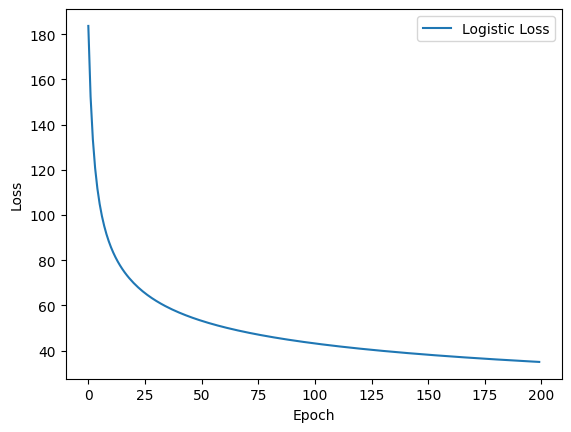

Precision: [0.47297297 0.62371134 0.4516129  0.93532338 0.41463415 0.375
 0.5952381  0.47150259 0.40196078 0.8447205  0.83886256 0.66371681
 0.87978142 0.37931034 0.42857143 0.73786408 0.44444444 0.6974359
 0.37727273 0.48       0.6519337  0.54625551 0.66013072 0.54929577]
Recall: [0.50724638 0.71176471 0.40191388 0.88262911 0.35416667 0.3
 0.47619048 0.48924731 0.3923445  0.81927711 0.79017857 0.57692308
 0.82564103 0.36666667 0.26470588 0.8042328  0.44444444 0.7431694
 0.4213198  0.44444444 0.65921788 0.62311558 0.71126761 0.56115108]
Macroaverage Precision: 0.5800646720496053
Macroaverage Recall: 0.5654690991140718


In [19]:
# Unigram Tokenization
precision21,recall21,p_macro21,r_macro21=main(label_data=product_types,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (5000, 24)
Final Weights Matrix(sample): [[ 0.83916681  0.58595685  0.72626172  0.25591633 -0.13268407]
 [ 0.44223935  0.50174527  0.64733542  0.57866953  0.37148159]
 [ 0.51291233  0.55309377  0.54712123  0.90022214  0.49628456]
 [ 0.60831262  0.31496381  0.6240673   0.18273146  0.01473541]
 [ 0.37023534  0.27175062  0.42269947  0.72846673  0.23254351]]


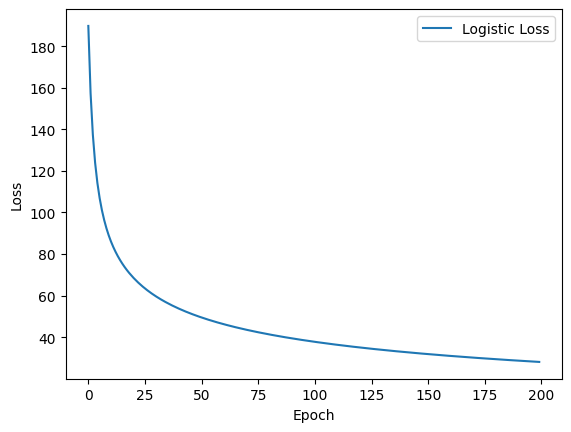

Precision: [0.53424658 0.64       0.47058824 0.90229885 0.64285714 0.6
 0.59793814 0.40277778 0.40101523 0.78911565 0.8436019  0.73684211
 0.84946237 0.53448276 0.5625     0.73831776 0.50862069 0.74863388
 0.46261682 0.47787611 0.74257426 0.59375    0.7962963  0.58333333]
Recall: [0.62234043 0.59259259 0.48484848 0.83957219 0.38297872 0.85714286
 0.59793814 0.42857143 0.42473118 0.78378378 0.83568075 0.73134328
 0.81443299 0.41333333 0.28125    0.82722513 0.4609375  0.71354167
 0.48768473 0.45762712 0.72463768 0.65841584 0.78658537 0.59868421]
Macroaverage Precision: 0.6316560778406829
Macroaverage Recall: 0.6169116424025167


In [20]:
# Unigram Tokenization with 5000 toptokens
precision21_5000,recall21_5000,p_macro21_5000,r_macro21_5000=main(label_data=product_types,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=5000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 24)
Final Weights Matrix(sample): [[0.70306952 0.55156165 0.76058241 0.37059649 0.0081337 ]
 [0.44881426 0.53392796 0.731692   0.58673813 0.47569135]
 [0.36292742 0.53812633 0.39213572 0.94380247 0.30641545]
 [0.50677213 0.32966412 0.62128569 0.34585631 0.06822884]
 [0.32284969 0.07589558 0.30403592 0.6909454  0.16262795]]


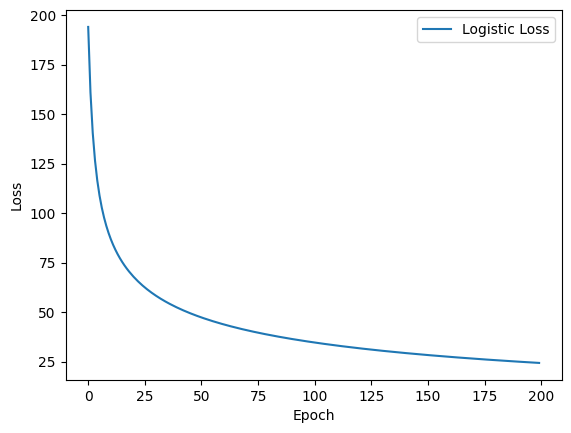

Precision: [0.52995392 0.6373057  0.46305419 0.88292683 0.59259259 0.8
 0.65217391 0.49009901 0.4137931  0.78       0.76470588 0.69767442
 0.89099526 0.48148148 0.4        0.78238342 0.54032258 0.75
 0.41666667 0.51304348 0.76       0.53982301 0.71698113 0.61486486]
Recall: [0.55555556 0.63076923 0.41048035 0.90049751 0.33333333 0.57142857
 0.625      0.47596154 0.41176471 0.76973684 0.8265896  0.75
 0.84304933 0.33333333 0.21428571 0.76649746 0.51937984 0.72307692
 0.52795031 0.55140187 0.72380952 0.66304348 0.70807453 0.67407407]
Macroaverage Precision: 0.6296183935879661
Macroaverage Recall: 0.6045455679018624


In [21]:
# Unigram Tokenization with 10000 toptokens
precision21_10000,recall21_10000,p_macro21_10000,r_macro21_10000=main(label_data=product_types,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Unigram with TF-IDF
precision22,recall22,p_macro22,r_macro22=main(label_data=product_types,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Unigram with stopwords flitering
precision23,recall23,p_macro23,r_macro23=main(label_data=product_types,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Unigram with both TF-IDF and stopwords flitering
precision24,recall24,p_macro24,r_macro24=main(label_data=product_types,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram Tokenization
precision25,recall25,p_macro25,r_macro25=main(label_data=product_types,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram with TF_IDF
precision26,recall26,p_macro26,r_macro26=main(label_data=product_types,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram with stopwords flitering
precision27,recall27,p_macro27,r_macro27=main(label_data=product_types,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram with both TF-IDF and stopwords flitering
precision28,recall28,p_macro28,r_macro28=main(label_data=product_types,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

### **3. Helpfulness(8/8)**

Final Weights Matrix Shape: (2500, 3)
Final Weights Matrix(sample): [[0.40626052 0.55840838 0.46105193]
 [0.37140417 0.64703335 0.45367003]
 [0.38361965 0.39333532 0.35074944]
 [0.56905811 0.6090972  0.54893766]
 [0.65998018 0.42693098 0.24185033]]


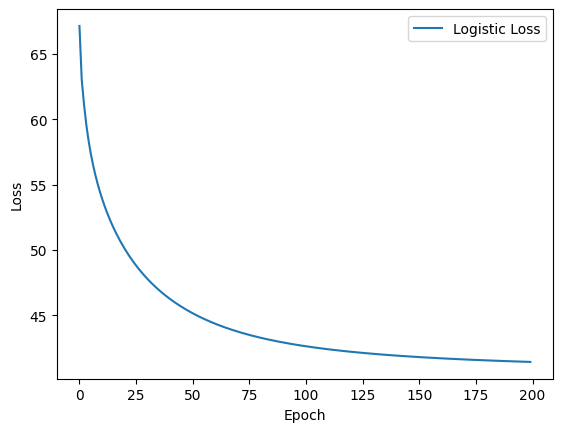

Precision: [0.378327   0.35724638 0.62264151]
Recall: [0.33671743 0.45563771 0.54944501]
Macroaverage Precision: 0.4527382941477138
Macroaverage Recall: 0.44726671369383747


In [22]:
# Unigram Tokenization
precision31,recall31,p_macro31,r_macro31=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (5000, 3)
Final Weights Matrix(sample): [[0.42965487 0.50891099 0.48715497]
 [0.39709734 0.61462374 0.46038646]
 [0.34821067 0.39660337 0.38289037]
 [0.58175315 0.59169994 0.55363988]
 [0.71322897 0.40550854 0.21002398]]


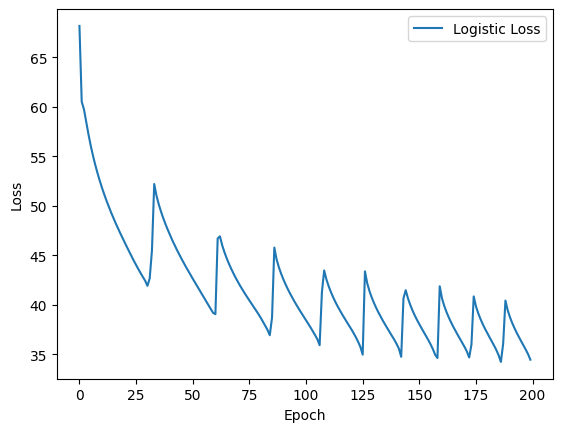

Precision: [0.37265918 0.3624318  0.60718172]
Recall: [0.33671743 0.43215613 0.56136821]
Macroaverage Precision: 0.4474242319191835
Macroaverage Recall: 0.44341392372413013


In [23]:
# Unigram Tokenization with 5000 toptokens
precision31_5000,recall31_5000,p_macro31_5000,r_macro31_5000=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=5000,
                   regex='[^ ]+',
                   eval_set="test")

Final Weights Matrix Shape: (10000, 3)
Final Weights Matrix(sample): [[0.37921826 0.468706   0.57779656]
 [0.40807378 0.55227387 0.5117599 ]
 [0.36113554 0.3434077  0.42316117]
 [0.55009383 0.534168   0.64283115]
 [0.69371924 0.36965587 0.26538638]]


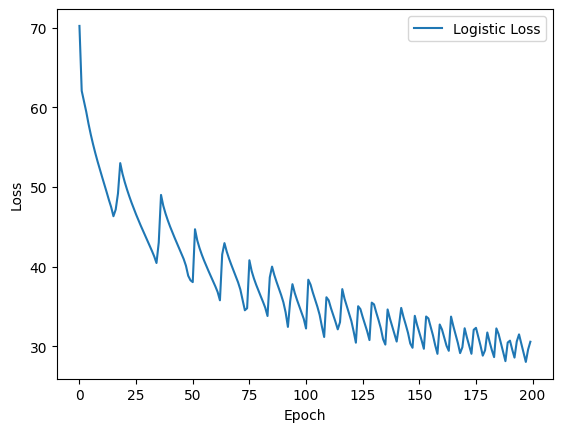

Precision: [0.46749226 0.41626794 0.59986273]
Recall: [0.2423756  0.1746988  0.85854617]
Macroaverage Precision: 0.49454097809524783
Macroaverage Recall: 0.4252068553551768


In [24]:
# Unigram Tokenization with 10000 toptokens
precision31_10000,recall31_10000,p_macro31_10000,r_macro31_10000=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=10000,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Unigram with TF-IDF
precision32,recall32,p_macro32,r_macro32=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=False,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Unigram with stopwords flitering
precision33,recall33,p_macro33,r_macro33=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Unigram with both TF-IDF and stopwords flitering
precision34,recall34,p_macro34,r_macro34=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=True,
                   n=1,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram Tokenization
precision35,recall35,p_macro35,r_macro35=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram with TF_IDF
precision36,recall36,p_macro36,r_macro36=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=False,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram with stopwords flitering
precision37,recall37,p_macro37,r_macro37=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=False,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")

In [ ]:
# Bigram with both TF-IDF and stopwords flitering
precision38,recall38,p_macro38,r_macro38=main(label_data=helpfulness_ratings,
                   apply_stopwords_list=True,
                   n=2,
                   TF_IDF=True,
                   k=32,
                   lr=0.001,
                   n_iters=200,
                   toptoken_num=2500,
                   regex='[^ ]+',
                   eval_set="test")